In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [33]:
data=pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding=('ISO-8859-1'),low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
data.shape

(181691, 135)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
data=data[["iyear","imonth","iday","country_txt","region","provstate","city","latitude","longitude","city"
          ,"location","summary","nkill","nwound","gname","motive","attacktype1_txt","targtype1_txt","weaptype1_txt","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region,provstate,city,latitude,longitude,city,location,summary,nkill,nwound,gname,motive,attacktype1_txt,targtype1_txt,weaptype1_txt,addnotes
0,1970,7,2,Dominican Republic,2,NaN,Santo Domingo,18.456792,-69.951164,Santo Domingo,NaN,NaN,1.0,0.0,MANO-D,NaN,Assassination,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,1,Federal,Mexico city,19.371887,-99.086624,Mexico city,NaN,NaN,0.0,0.0,23rd of September Communist League,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,5,Tarlac,Unknown,15.478598,120.599741,Unknown,NaN,NaN,1.0,0.0,Unknown,NaN,Assassination,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,8,Attica,Athens,37.997490,23.762728,Athens,NaN,NaN,NaN,NaN,Unknown,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,4,Fukouka,Fukouka,33.580412,130.396361,Fukouka,NaN,NaN,NaN,NaN,Unknown,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region           181691 non-null  int64  
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   city             181257 non-null  object 
 10  location         55495 non-null   object 
 11  summary          115562 non-null  object 
 12  nkill            171378 non-null  float64
 13  nwound           165380 non-null  float64
 14  gname            181691 non-null  object 
 15  motive           50561 non-null   object 
 16  attacktype1_txt  181691 non-null  obje

In [14]:
data.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region                  0
provstate             421
city                  434
latitude             4556
longitude            4557
city                  434
location           126196
summary             66129
nkill               10313
nwound              16311
gname                   0
motive             131130
attacktype1_txt         0
targtype1_txt           0
weaptype1_txt           0
addnotes           153402
dtype: int64

In [15]:
data.describe()

,iyear,imonth,iday,region,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,7.160938,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,2.933408,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,10.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,12.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [16]:
df=data["iyear"].value_counts(dropna=False).sort_index()
df.head()

1970    651
1971    471
1972    568
1973    473
1974    581
Name: iyear, dtype: int64

In [17]:
data=pd.DataFrame(data)
data.head()

,iyear,imonth,iday,country_txt,region,provstate,city,latitude,longitude,city,location,summary,nkill,nwound,gname,motive,attacktype1_txt,targtype1_txt,weaptype1_txt,addnotes
0,1970,7,2,Dominican Republic,2,NaN,Santo Domingo,18.456792,-69.951164,Santo Domingo,NaN,NaN,1.0,0.0,MANO-D,NaN,Assassination,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,1,Federal,Mexico city,19.371887,-99.086624,Mexico city,NaN,NaN,0.0,0.0,23rd of September Communist League,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,5,Tarlac,Unknown,15.478598,120.599741,Unknown,NaN,NaN,1.0,0.0,Unknown,NaN,Assassination,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,8,Attica,Athens,37.997490,23.762728,Athens,NaN,NaN,NaN,NaN,Unknown,NaN,Bombing/Explosion,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,4,Fukouka,Fukouka,33.580412,130.396361,Fukouka,NaN,NaN,NaN,NaN,Unknown,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN


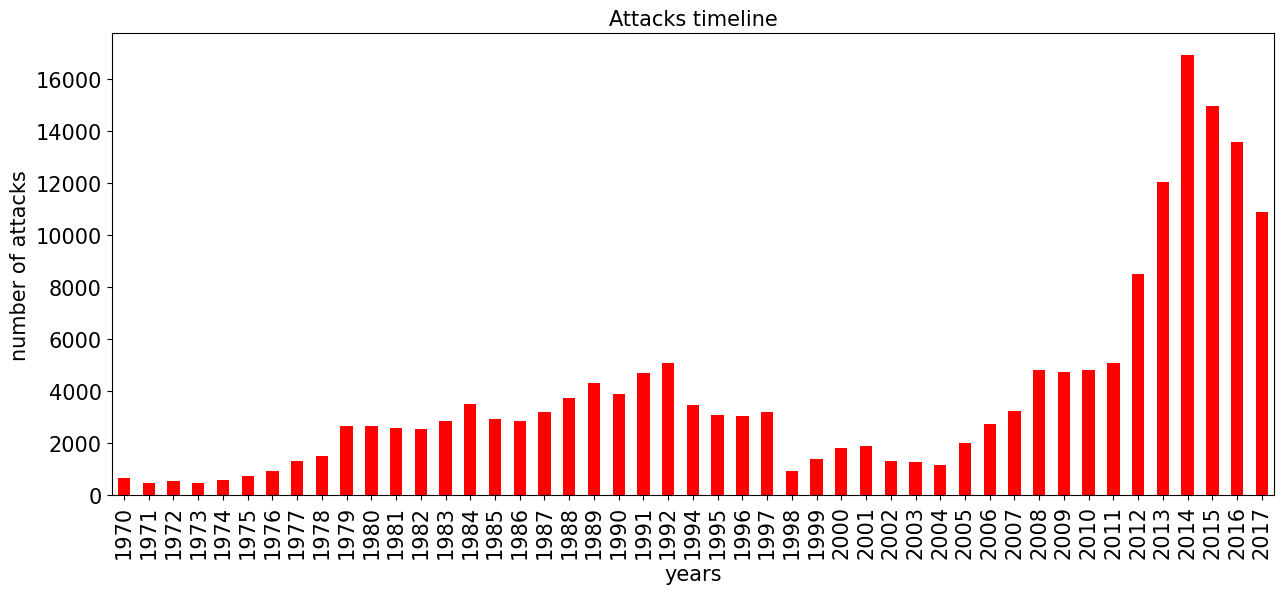

In [18]:
df.plot(kind="bar",color="red",figsize=(15,6),fontsize=15)
plt.title("Attacks timeline",fontsize=15)
plt.xlabel("years",fontsize=15)
plt.ylabel("number of attacks",fontsize=15)
plt.show()

In [19]:
yk=data[["iyear","nkill"]].groupby("iyear").sum()
yk.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [20]:
yf=data[["iyear","nwound"]].groupby("iyear").sum()
yf.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


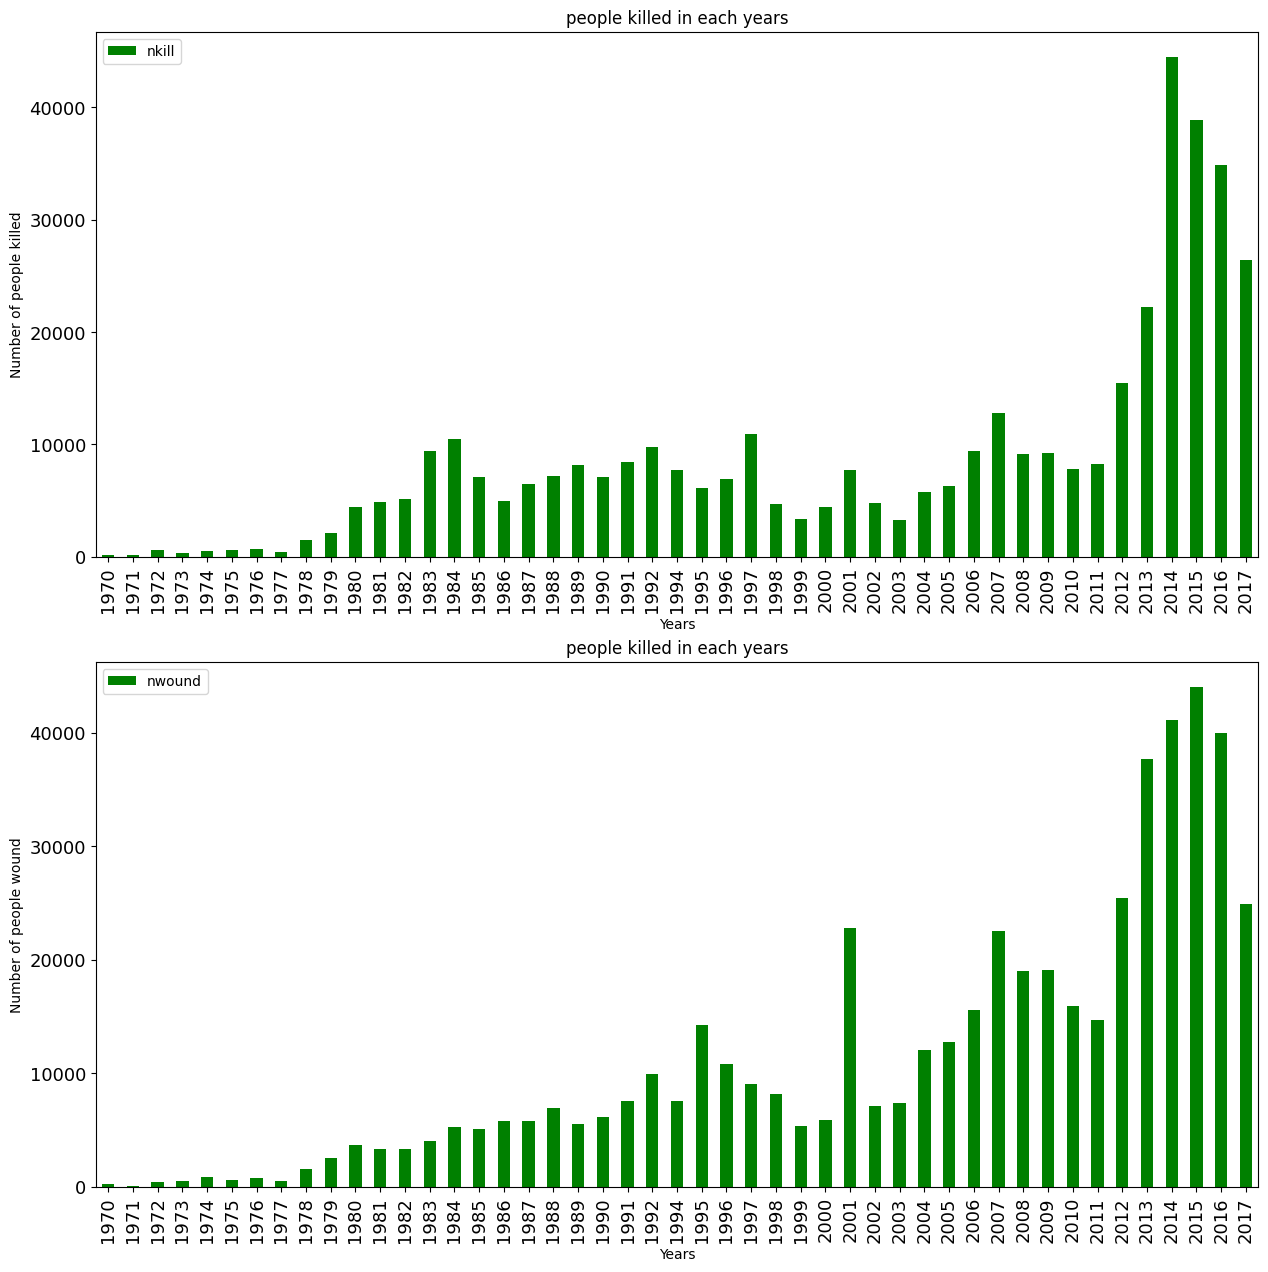

In [24]:
fig=plt.figure()
a0=fig.add_subplot(2,1,1)
a1=fig.add_subplot(2,1,2)

yk.plot(kind="bar",color="green",figsize=(15,15),fontsize=13,ax=a0)
a0.set_title("people killed in each years")
a0.set_xlabel("Years")
a0.set_ylabel("Number of people killed")

yf.plot(kind="bar",color="green",figsize=(15,15),fontsize=13,ax=a1)
a1.set_title("people killed in each years")
a1.set_xlabel("Years")
a1.set_ylabel("Number of people wound")

plt.show()

In [22]:
re=pd.crosstab(data.iyear,data.region)
re.head()

region,1,2,3,4,5,6,7,8,9,10,11,12
iyear,,,,,,,,,,,,
1970,472,7,65,2,10,1,0,50,12,28,3,1
1971,247,5,24,1,6,0,0,125,5,55,2,1
1972,73,3,33,0,16,1,0,376,1,53,4,8
1973,64,6,83,2,2,1,0,290,1,19,4,1
1974,111,11,81,4,3,2,0,317,2,42,7,1


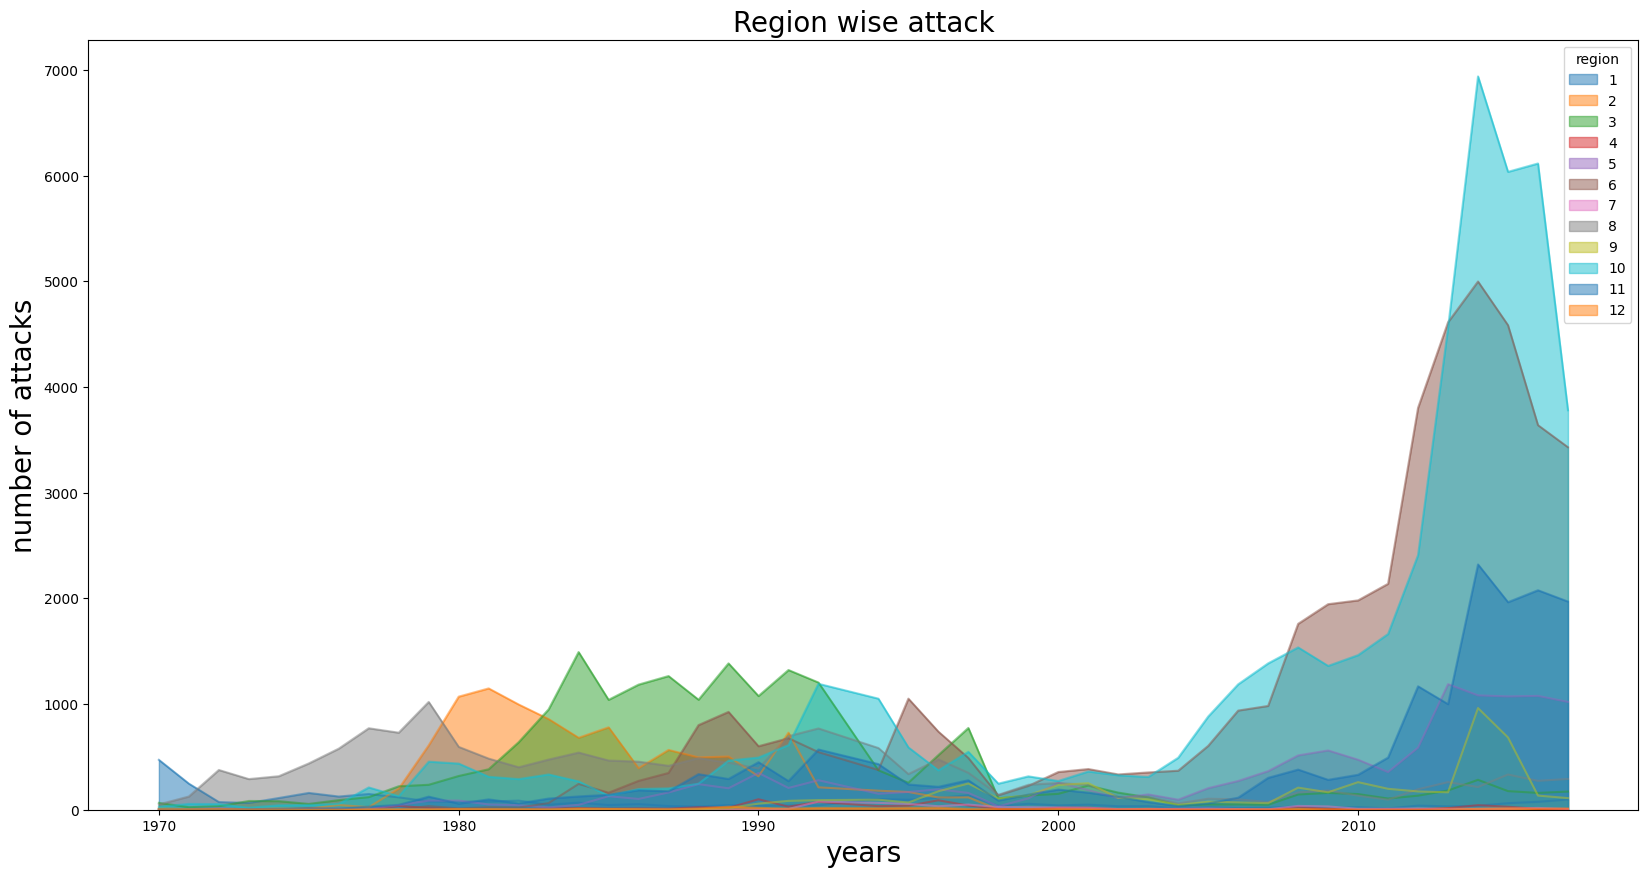

In [23]:
re.plot(kind="area",stacked=False , alpha=0.5 , figsize=(20,10))
plt.title("Region wise attack",fontsize=20)
plt.xlabel("years",fontsize=20)
plt.ylabel("number of attacks",fontsize=20)
plt.show()

In [25]:
attack=pd.crosstab(data.iyear,data.nkill)
attack.head()

nkill,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,433.0,517.0,518.0,588.0,670.0,953.0,1180.0,1383.0,1384.0,1570.0
iyear,,,,,,,,,,,,,,,,,,,,,
1970,544,49,8,2,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,298,90,11,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,202,271,29,8,2,1,1,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1973,180,204,26,6,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1974,283,185,35,3,1,1,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cg=data["country_txt"].value_counts().head(10)
cg


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

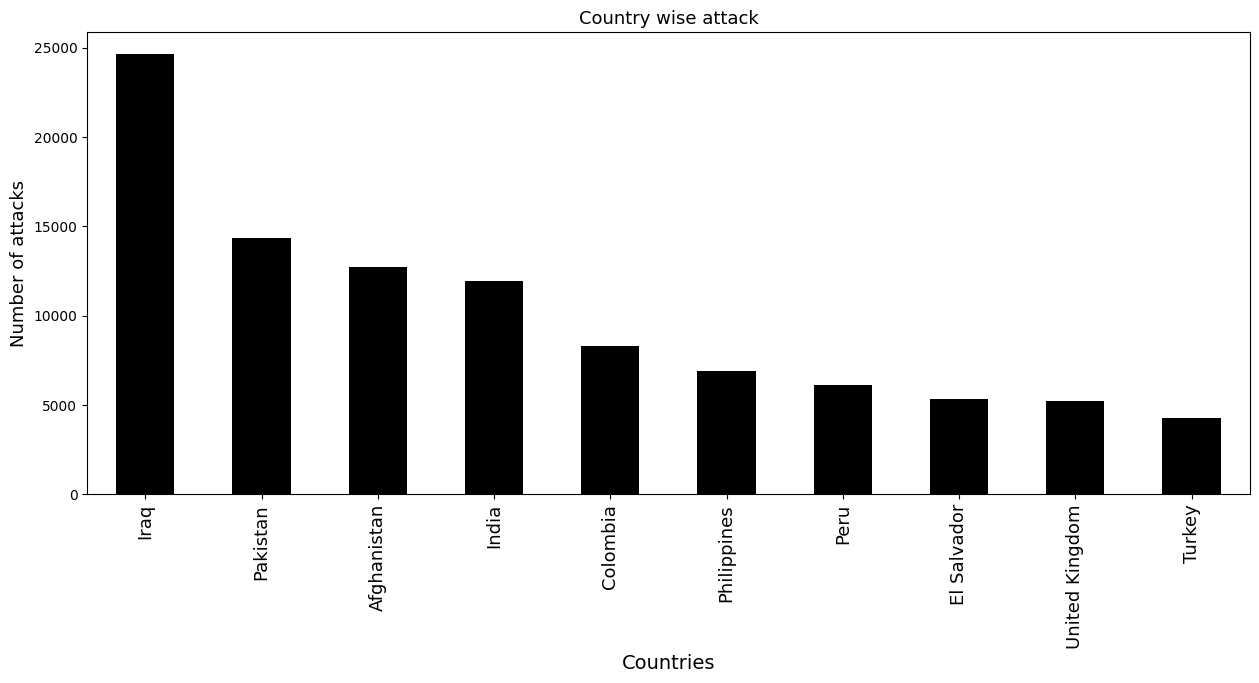

In [45]:
cg.plot(kind="bar",color="black",figsize=(15,6))
plt.title("Country wise attack",fontsize=13)
plt.xlabel("Countries",fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel("Number of attacks",fontsize=13)
plt.show()